In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('agg_Xtrain_V2.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest_V2.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain_V2.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest_V2.csv').set_index('Unnamed: 0')

In [3]:
%%time
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred = gnb.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.0752388236382891, recall: 0.0625, f1score: 0.06645524722037065
CPU times: user 6.46 ms, sys: 913 µs, total: 7.37 ms
Wall time: 6.57 ms


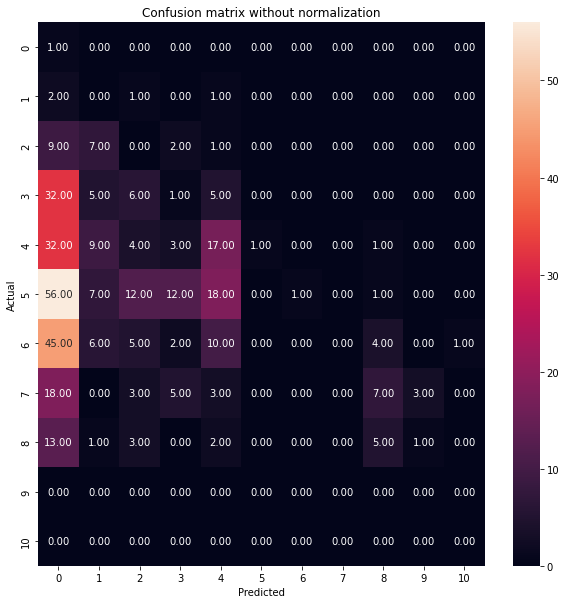

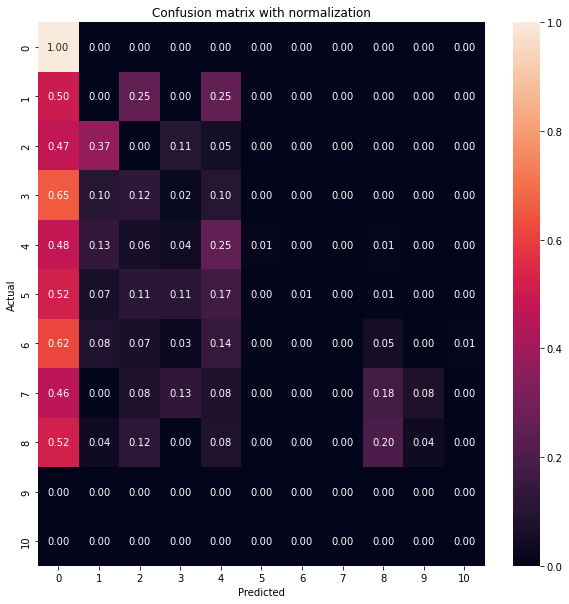

In [4]:
#plot results

matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [5]:
print('training data')
print(classification_report(y_train, gnb.predict(X_train)))

print('test data')
print(classification_report(y_test, gnb.predict(X_test)))

training data
              precision    recall  f1-score   support

         0.0       0.20      1.00      0.33       351
         1.0       0.47      0.75      0.57       351
         2.0       0.32      0.24      0.27       351
         3.0       0.27      0.09      0.14       351
         4.0       0.21      0.17      0.19       351
         5.0       1.00      0.00      0.01       351
         6.0       0.20      0.01      0.01       351
         7.0       0.00      0.00      0.00       351
         8.0       0.29      0.10      0.15       351
         9.0       0.92      1.00      0.96       351
        10.0       1.00      1.00      1.00       351

    accuracy                           0.40      3861
   macro avg       0.44      0.40      0.33      3861
weighted avg       0.44      0.40      0.33      3861

test data
              precision    recall  f1-score   support

         0.0       0.00      1.00      0.01         1
         1.0       0.00      0.00      0.00         4
